In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import random

n_samples = 500
x_train = [random.randint(i, (i+random.randint(0,100))) + random.randint(0,100) for i in range(n_samples)]
y_train = [random.randint(i, (i+random.randint(0,100))) + random.randint(0,100) for i in range(n_samples)]

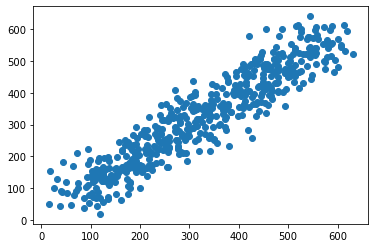

In [11]:
plt.scatter(x_train, y_train)

In [12]:
class LinearRegressionWithSGD:
    def __init__(self):
        # weight initialization
        self.W = 0
        self.b = 0
        self.alpha = 0.001
        
    def __min_max_scaler__(self, X, y, feature_range):
        X = np.array(X)
        y = np.array(y)
        
        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        X_scaled = X_std * (feature_range[1] - feature_range[0]) + feature_range[0]
        
        y_std = (y - y.min(axis=0)) / (y.max(axis=0) - y.min(axis=0))
        y_scaled = y_std * (feature_range[1] - feature_range[0]) + feature_range[0]
        
        return X_scaled, y_scaled
    
    def __data_generator__(self,data, batch_size,):
        for i in range(len(data) // batch_size):
            yield data[i*batch_size:(i+1)*batch_size]
        
    def fit(self, X, y, num_iters=10001, train_batch_size=10,):
        self.loss_history = []
        for iter_ in range(num_iters):  
            
            X,y = self.__min_max_scaler__(X, y,(0,10))
            
            X_generator = self.__data_generator__(X,train_batch_size)
            y_generator = self.__data_generator__(y,train_batch_size)
        
            for i in range(len(X) // train_batch_size):
                x_sample = next(X_generator)
                y_sample = next(y_generator)
                
                # forward pass - calculating model prediction and loss
                
                output = self.predict(x_sample)
                error = self.__loss_fn__(y_sample, output)
                
                output = np.array(output)
                error = np.array(error)
                # backward pass - calculating loss derivative and updating weights

                der_Lw = np.sum((output - y_sample) * x_sample)
                der_Lb = np.sum((output - y_sample))
                
                self.W = self.W - der_Lw * self.alpha
                self.b = self.b - der_Lb * self.alpha

            if iter_ % 1000 == 0:
                self.alpha *= 0.99
                print('[{}] train_error: {}'.format(iter_, error))
                self.loss_history.append(error)
        self.__plot_results__(X, y)
                
    def predict(self, X):
        return np.dot(self.W,X) + self.b
        
    def __loss_fn__(self, y_true, y_predicted):
        # calculating mse
        return np.mean((y_true - y_predicted) ** 2)
    
    def __plot_results__(self, X, y):
        plt.figure(figsize=(20,20))
        plot1 = plt.subplot2grid((3, 3), (0, 2), )
        plot2 = plt.subplot2grid((3, 3), (0, 1), )
        plot3 = plt.subplot2grid((3, 3), (0, 0), )
        plot3.scatter(X, y)
        plot2.scatter(X, y)
        plot2.plot(X ,(self.W*np.array(X )+ self.b), color='orange')
        plot1.plot(self.loss_history)
        plot1.set_title('Loss history')
        plot2.set_title('Result')
        plt.show()

In [17]:
class LinearRegressionWithAdam:
    """
    Объект алгоритма линейной регрессии, который содержит методы:
    :fit(X, y) - обучить алгоритм, настроить параметры.
    :predict(X) - проставить предсказания модели для объектов выборки Х.
    :loss_fn(y_true, y_predicted) - посчитать значение функции ошибки. 
    """
    def __init__(self):
        # инициализация весов
        self.W = 0
        self.b = 0
        self.alpha = 0.001
        self.b1 = 0.9
        self.b2 = 0.99
        self.eps = 1e-8
        
    def __min_max_scaler__(self, X, y, feature_range):
        X = np.array(X)
        y = np.array(y)
        
        X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
        X_scaled = X_std * (feature_range[1] - feature_range[0]) + feature_range[0]
        
        y_std = (y - y.min(axis=0)) / (y.max(axis=0) - y.min(axis=0))
        y_scaled = y_std * (feature_range[1] - feature_range[0]) + feature_range[0]
        
        return X_scaled, y_scaled
        
    def __data_generator__(self,data, batch_size,):
        for i in range(len(data) // batch_size):
            yield data[i*batch_size:(i+1)*batch_size]
        
    def fit(self, X, y, num_iters=10001, train_batch_size=10,):
        mi = 0 
        vi = 0 
        gi = 0 
        
        self.loss_history = []
        
        for iter_ in range(num_iters):  
            X_history, y_history = [], []
            
            X,y = self.__min_max_scaler__(X, y,(0,10))
            
            X_generator = self.__data_generator__(X,train_batch_size)
            y_generator = self.__data_generator__(y,train_batch_size)
        
            for i in range(len(X) // train_batch_size):
                x_sample = next(X_generator)
                y_sample = next(y_generator)
                
                X_history += list(x_sample)
                y_history += list(y_sample)
                
                # forward pass - calculating model prediction and loss
                
                output = self.predict(x_sample)
                error = self.__loss_fn__(y_sample, output)
                
                
                output = np.array(output)
                error = np.array(error)
                # backward pass - calculating loss derivative and updating weights

                der_Lw = np.sum((output - y_sample) * x_sample)
                der_Lb = np.sum((output - y_sample))

                mi = self.b1 * mi + (1 - self.b1) * der_Lw
                vi = self.b2 * vi  + (1 - self.b2) * der_Lw**2
                mi_hat = mi / (1 - self.b1**(iter_+1))
                vi_hat = vi / (1 - self.b2**(iter_+1))

                self.W = self.W - self.alpha * mi_hat / (np.sqrt(vi) + self.eps)

                mi = self.b1 * mi + (1 - self.b1) * der_Lb
                vi = self.b2 * vi  + (1 - self.b2) * der_Lb**2
                mi_hat = mi / (1 - self.b1**(iter_+1))
                vi_hat = vi / (1 - self.b2**(iter_+1))

                self.b = self.b - self.alpha * mi_hat / (np.sqrt(vi) + self.eps)
                
            if iter_ % 1000 == 0:
                self.alpha *= 0.99
                print('[{}] train_error: {}'.format(iter_, error))
                self.loss_history.append(error)
        self.__plot_results__(X, y)
                
    def predict(self, X):
        return np.dot(self.W,X) + self.b
        
    def __loss_fn__(self, y_true, y_predicted):
        # calculating mse
        return np.mean((y_true - y_predicted) ** 2) 
    
    def __plot_results__(self, X, y):
        plt.figure(figsize=(20,20))
        plot1 = plt.subplot2grid((3, 3), (0, 2), )
        plot2 = plt.subplot2grid((3, 3), (0, 1), )
        plot3 = plt.subplot2grid((3, 3), (0, 0), )
        plot3.scatter(X, y)
        plot2.scatter(X, y)
        plot2.plot(X ,(self.W*np.array(X )+ self.b), color='orange')
        plot1.plot(self.loss_history)
        plot1.set_title('Loss history')
        plot2.set_title('Result')
        plt.show()

In [18]:
linreg_adam = LinearRegressionWithAdam()
linreg_sgd = LinearRegressionWithSGD()

[0] train_error: 0.7885699896608044
[1000] train_error: 0.48175082187873014
[2000] train_error: 0.4526412669809525
[3000] train_error: 0.43664710838384824
[4000] train_error: 0.42779227903988054
[5000] train_error: 0.42282178265593295
[6000] train_error: 0.42000084720814324
[7000] train_error: 0.4183953506005668
[8000] train_error: 0.4174906486462837
[9000] train_error: 0.4169963349023444
[10000] train_error: 0.41674517554789314


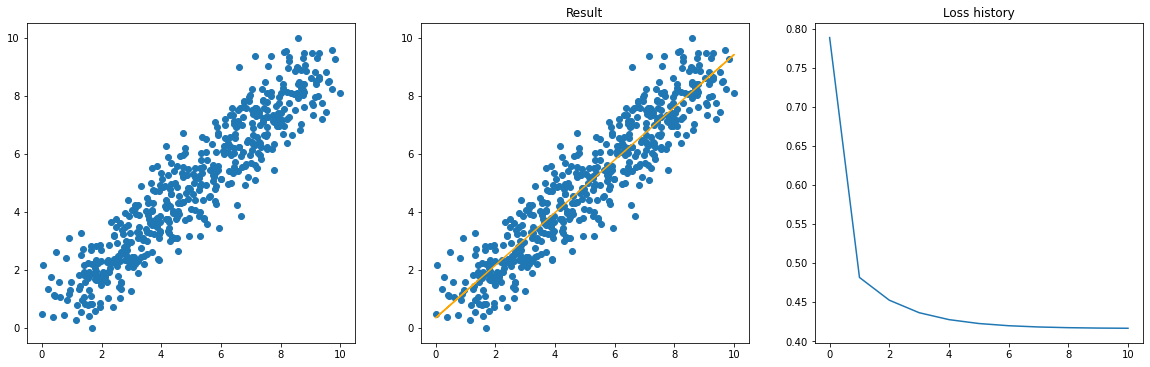

CPU times: user 19.2 s, sys: 1.17 s, total: 20.3 s
Wall time: 19.3 s


In [23]:
%%time
linreg_adam.fit(x_train, y_train,num_iters=10001)

[0] train_error: 0.448882597892983
[1000] train_error: 0.42704872166297136
[2000] train_error: 0.4259263631131732
[3000] train_error: 0.4248119784490383
[4000] train_error: 0.42370573766067743
[5000] train_error: 0.4226078095387951
[6000] train_error: 0.4215183618748675
[7000] train_error: 0.4204375615437823
[8000] train_error: 0.41936557448543504
[9000] train_error: 0.4183025656004187
[10000] train_error: 0.4172486985736962


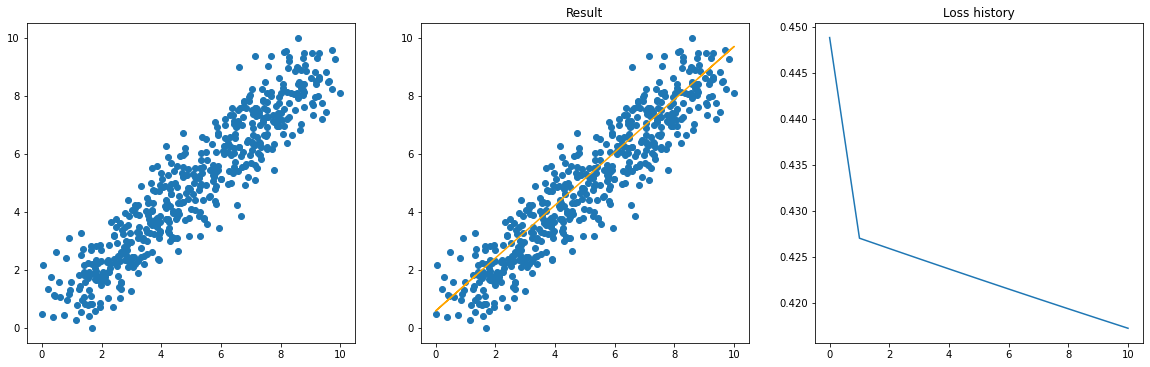

In [24]:
linreg_sgd.fit(x_train, y_train,)

In [25]:
linreg_adam.W

0.905685280358236

In [26]:
linreg_sgd.W

0.9096334516595855

In [27]:
linreg_adam.b

0.359956119422351

In [28]:
linreg_sgd.b

0.5981942468773203